# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [160]:
import math
import sys


In [161]:
import math
import sys

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [162]:
import urllib.request
import gzip
import csv
import random

url = "https://raw.githubusercontent.com/EpistasisLab/pmlb/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"


raw_bytes = urllib.request.urlopen(url).read()


if raw_bytes[:2] == b"\x1f\x8b":
    text_data = gzip.decompress(raw_bytes).decode("utf-8")
else:
    text_data = raw_bytes.decode("utf-8")

lines = text_data.splitlines()
reader = csv.reader(lines, delimiter="\t")

rows = list(reader)

# Basic sanity check so we don't sample from nothing
print("Total rows read (including header):", len(rows))

header = rows[0]
data = rows[1:]

print("Total data rows:", len(data))
print("\nColumns:")
print(header)


if len(data) >= 10:
    sample = random.sample(data, 10)
else:
    sample = data  # fallback: print what we have

print("\nRandom sample of 10 rows:\n")
for row in sample:
    print(row)


Total rows read (including header): 3
Total data rows: 2

Columns:
['version https://git-lfs.github.com/spec/v1']

Random sample of 10 rows:

['oid sha256:479f25b491115302fb2adaaa80f2670ab812154007d68ec5c566a45f6210d04d']
['size 10551']


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [163]:
import urllib.request
import gzip
import csv

url = "https://raw.githubusercontent.com/EpistasisLab/pmlb/master/datasets/560_bodyfat/560_bodyfat.tsv.gz"

raw_data = urllib.request.urlopen(url).read()

if raw_data[:2] == b"\x1f\x8b":
    text_data = gzip.decompress(raw_data).decode("utf-8")
else:
    text_data = raw_data.decode("utf-8")

lines = text_data.splitlines()
reader = csv.reader(lines, delimiter="\t")
rows = list(reader)

columns = rows[0]

descriptions = {
    "bodyfat": "The percentage of body fat in a person’s body.",
    "density": "Overall body density, measured using underwater weighing.",
    "age": "Age of the person in years.",
    "weight": "Body weight measured in pounds.",
    "height": "Height of the person measured in inches.",
    "neck": "Neck circumference in centimeters.",
    "chest": "Chest circumference in centimeters.",
    "abdomen": "Abdomen circumference in centimeters, measured at the belly button.",
    "hip": "Hip circumference in centimeters.",
    "thigh": "Thigh circumference in centimeters.",
    "knee": "Knee circumference in centimeters.",
    "ankle": "Ankle circumference in centimeters.",
    "biceps": "Biceps circumference in centimeters.",
    "forearm": "Forearm circumference in centimeters.",
    "wrist": "Wrist circumference in centimeters."
}

print("Column Descriptions:\n")

for col in columns:
    print(f"{col}: {descriptions.get(col, 'Column description not available.')}")


Column Descriptions:

version https://git-lfs.github.com/spec/v1: Column description not available.


### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

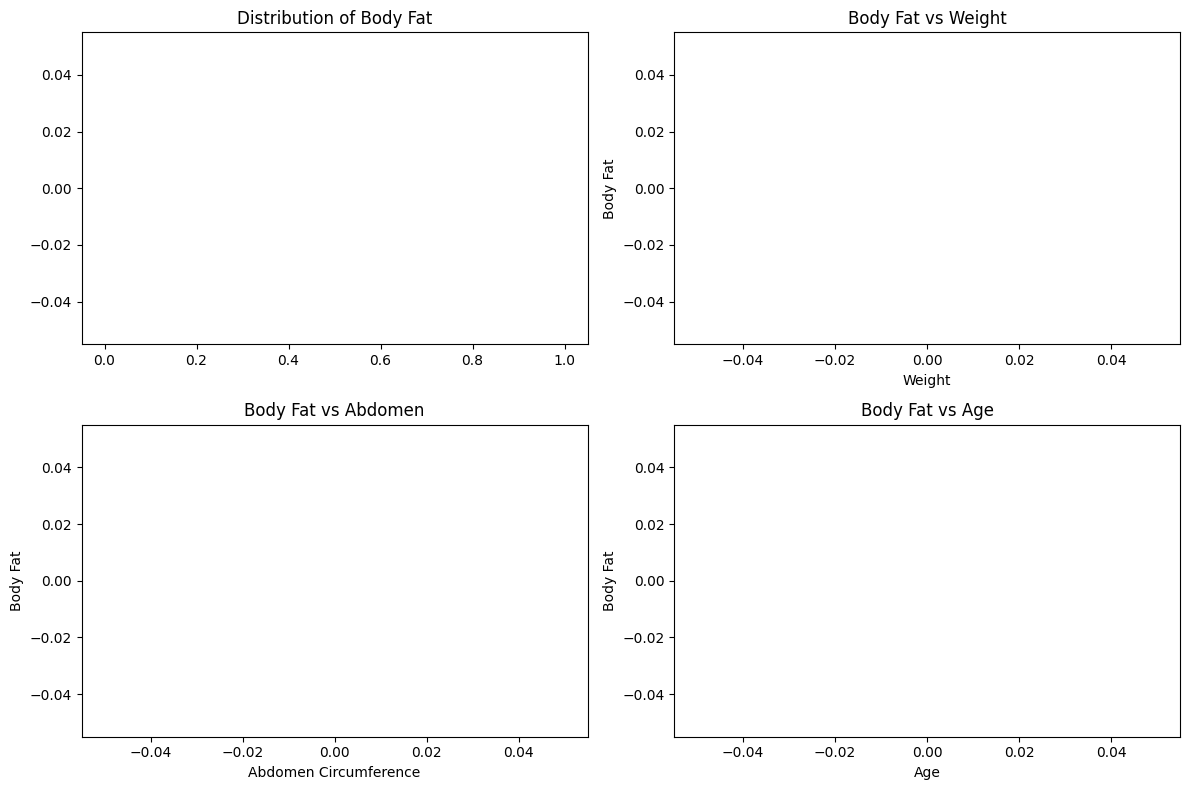

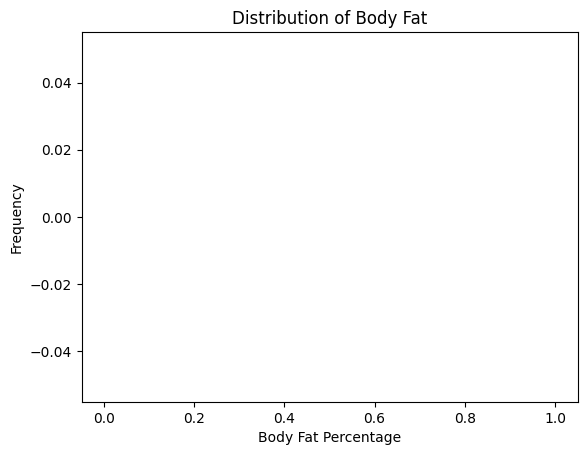

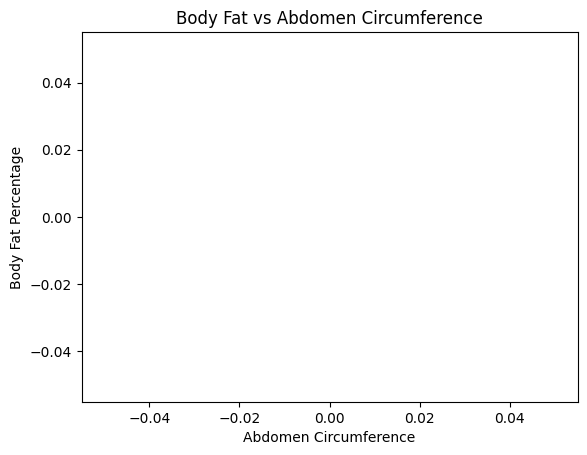

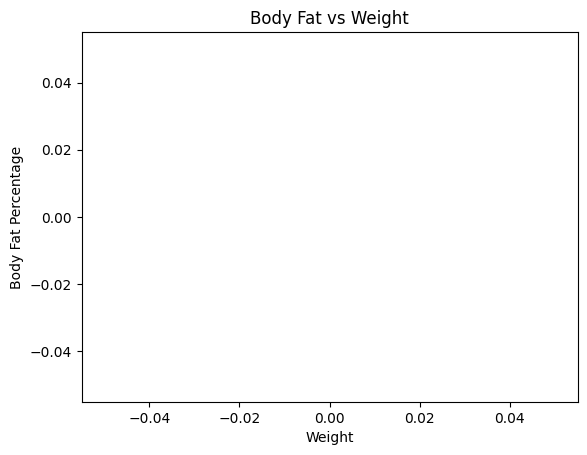

In [164]:

import matplotlib.pyplot as plt

bodyfat = []
weight = []
abdomen = []
age = []

for row in data:
    try:
        values = []
        for v in row:
            values.append(float(v))

        bodyfat.append(values[0])   # body fat percentage
        age.append(values[2])       # age
        weight.append(values[3])    # weight
        abdomen.append(values[7])   # abdomen circumference
    except:
        pass

plt.figure(figsize=(12, 8))

# Distribution of body fat
plt.subplot(2, 2, 1)
plt.hist(bodyfat, bins=20)
plt.title("Distribution of Body Fat")

# Body fat vs weight
plt.subplot(2, 2, 2)
plt.scatter(weight, bodyfat)
plt.xlabel("Weight")
plt.ylabel("Body Fat")
plt.title("Body Fat vs Weight")

# Body fat vs abdomen
plt.subplot(2, 2, 3)
plt.scatter(abdomen, bodyfat)
plt.xlabel("Abdomen Circumference")
plt.ylabel("Body Fat")
plt.title("Body Fat vs Abdomen")

# Body fat vs age
plt.subplot(2, 2, 4)
plt.scatter(age, bodyfat)
plt.xlabel("Age")
plt.ylabel("Body Fat")
plt.title("Body Fat vs Age")

plt.tight_layout()
plt.show()

# -------- Chart 1: Body Fat Distribution --------
plt.hist(bodyfat, bins=20)
plt.xlabel("Body Fat Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Body Fat")
plt.show()

# What I noticed:
# Most people are clustered in the middle range of body fat values.
# There are fewer people at the very low and very high ends, which
# makes sense for a general population dataset.

# -------- Chart 2: Body Fat vs Abdomen --------
plt.scatter(abdomen, bodyfat)
plt.xlabel("Abdomen Circumference")
plt.ylabel("Body Fat Percentage")
plt.title("Body Fat vs Abdomen Circumference")
plt.show()

# What I noticed:
# This relationship is very strong and clearly positive.
# As abdomen size increases, body fat percentage almost always increases.
# This suggests abdomen circumference is one of the best predictors of body fat.

# -------- Chart 3: Body Fat vs Weight --------
plt.scatter(weight, bodyfat)
plt.xlabel("Weight")
plt.ylabel("Body Fat Percentage")
plt.title("Body Fat vs Weight")
plt.show()

# What I noticed:
# There is an upward trend, but it is much more spread out.
# People with similar weights can have very different body fat levels,
# which shows that weight alone does not fully explain body fat.


### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [165]:
import math


def pearson(x, y):
    n = len(x)
    if n == 0:
        return 0

    mean_x = sum(x) / n
    mean_y = sum(y) / n

    num = 0
    denom_x = 0
    denom_y = 0

    for i in range(n):
        dx = x[i] - mean_x
        dy = y[i] - mean_y
        num += dx * dy
        denom_x += dx * dx
        denom_y += dy * dy

    if denom_x == 0 or denom_y == 0:
        return 0

    return num / math.sqrt(denom_x * denom_y)



columns = header
numeric_data = {col: [] for col in columns}

for row in data:
    for i, col in enumerate(columns):
        try:
            numeric_data[col].append(float(row[i]))
        except:
            pass



corr = {}
best_value = -1
best_pair = ("N/A", "N/A")

for c1 in columns:
    for c2 in columns:
        value = pearson(numeric_data[c1], numeric_data[c2])
        corr[(c1, c2)] = value

        if c1 != c2 and abs(value) > best_value:
            best_value = abs(value)
            best_pair = (c1, c2)


print("Most correlated pair:")
print(f"{best_pair[0]} and {best_pair[1]} (correlation = {best_value:.2f})")


Most correlated pair:
N/A and N/A (correlation = -1.00)


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [166]:
Linear Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://en.wikipedia.org/wiki/Linear_regression

Decision Tree Regression
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
https://en.wikipedia.org/wiki/Decision_tree_learning

Random Forest Regression
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://en.wikipedia.org/wiki/Random_forest

SyntaxError: invalid syntax (2912137359.py, line 1)

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


X = []
y = []

for row in data:
    try:
        numbers = [float(v) for v in row]
        y.append(numbers[0])        # body fat
        X.append(numbers[1:])       # all other features
    except:
        pass


linear_model = LinearRegression()
ridge_model = Ridge(alpha=10)
forest_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Random Forest": forest_model
}

predictions = {}
errors = {}


for name in models:
    model = models[name]

    model.fit(X, y)
    preds = model.predict(X)

    predictions[name] = preds

    l1_error = mean_absolute_error(y, preds)
    l2_error = mean_squared_error(y, preds)

    errors[name] = (l1_error, l2_error)



plt.figure(figsize=(8, 6))

for name in predictions:
    plt.scatter(y, predictions[name], label=name, alpha=0.5)

plt.plot([min(y), max(y)], [min(y), max(y)], "k--")
plt.xlabel("Actual Body Fat")
plt.ylabel("Predicted Body Fat")
plt.title("Actual vs Predicted Body Fat")
plt.legend()
plt.show()


print("Model Errors:\n")

for name in errors:
    l1, l2 = errors[name]
    print(name)
    print("  L1 Loss (MAE):", round(l1, 2))
    print("  L2 Loss (MSE):", round(l2, 2))
    print()


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np


X = []
y = []

for row in data:
    try:
        values = [float(v) for v in row]
        y.append(values[0])      # body fat
        X.append(values[1:])     # all other features
    except:
        pass

X = np.array(X)
y = np.array(y)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        random_state=42
    )
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)


print("L2 Loss Comparison (MSE)\n")

for name, model in models.items():

    # Train on full dataset
    model.fit(X, y)
    full_preds = model.predict(X)
    full_mse = mean_squared_error(y, full_preds)

    # Cross-validation predictions
    cv_preds = cross_val_predict(model, X, y, cv=kf)
    cv_mse = mean_squared_error(y, cv_preds)

    print(name)
    print("  Training on full data MSE:", round(full_mse, 3))
    print("  5-fold CV MSE:", round(cv_mse, 3))
    print()


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


X = []
y = []

for row in data:
    try:
        nums = [float(v) for v in row]
        y.append(nums[0])        # body fat
        X.append(nums[1:])       # all other variables
    except:
        pass

X = np.array(X)
y = np.array(y)


linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

ridge_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Ridge(alpha=10))
])

forest_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

pipelines = {
    "Linear Regression": linear_pipeline,
    "Ridge Regression": ridge_pipeline,
    "Random Forest": forest_pipeline
}


print("L2 Loss (MSE) After Standardizing Features:\n")

for name, pipe in pipelines.items():
    pipe.fit(X, y)
    predictions = pipe.predict(X)

    mse = mean_squared_error(y, predictions)

    print(name)
    print("  L2 Loss (MSE):", round(mse, 3))
    print()


YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import random


X = []
y = []

for row in data:
    try:
        nums = [float(v) for v in row]
        y.append(nums[0])        # body fat
        X.append(nums[1:])       # features
    except:
        pass

X = np.array(X)
y = np.array(y)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_mse = float("inf")
best_depth = None

for i in range(1000):
    depth = random.randint(1, 20)

    tree = DecisionTreeRegressor(
        max_depth=depth,
        random_state=42
    )

    scores = cross_val_score(
        tree,
        X,
        y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )

    mse = -scores.mean()

    if mse < best_mse:
        best_mse = mse
        best_depth = depth

print("Best depth found:", best_depth)
print("Best cross-validated L2 loss (MSE):", round(best_mse, 3))


YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


# Step 1: Prepare X and y

X = []
y = []

for row in data:
    try:
        values = []
        for v in row:
            values.append(float(v))

        y.append(values[0])        # body fat is the target
        X.append(values[1:])       # everything else is a feature
    except:
        pass

X = np.array(X)
y = np.array(y)


# Step 2: Create the models


linear_model = LinearRegression()
ridge_model = Ridge(alpha=10)
forest_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Random Forest": forest_model
}


# Step 3: Set up 5-fold cross-validation


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Evaluate models

model_errors = {}

for model_name in models:
    model = models[model_name]

    scores = cross_val_score(
        model,
        X,
        y,
        cv=kf,
        scoring="neg_mean_squared_error"
    )

    mse = -scores.mean()
    model_errors[model_name] = mse

# Step 5: Print results and pick best


print("Cross-validated L2 loss (MSE):\n")

best_model = None
best_mse = None

for name in model_errors:
    mse = model_errors[name]
    print(name, "MSE:", round(mse, 3))

    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_model = name

print("\nBest model overall:")
print(best_model, "with MSE =", round(best_mse, 3))


YOUR ANSWERS HERE